In [5]:
################# 
#Import necessary package for pandas library 
######################  

import pandas as pd
import numpy as np

################# 
#Import necessary package for scraping 
######################

from bs4 import BeautifulSoup
import requests
from requests import get 
import re

# import get from request to get all the pa
###############################################################
###### Import necessary  library to look on the different page######
#############################################################
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output # Since we’re going to make 72 requests,Our work will look a bit untidy 
                                              #. To avoid that, we’ll clear the output after each iteration
import warnings

###############################################################
###### Import necessary  library to get coordinate from an adress ######
#############################################################

from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter # convert an address into latitude and longitude values

#########################################################################
###### Import necessary library for ploting
##########################################################################

import matplotlib.pyplot as plt
%matplotlib inline 

#########################################################################
###### Import geo Mapping
##########################################################################
import folium 

In [2]:
url_home_box='https://www.homebox.fr/garde-meuble-paris.html'# url from homebox
result=requests.get(url_home_box) # Storr the url in the variable result
#result.text[:500] # Show the first 1000 charactère for the link 

In [3]:
soup=BeautifulSoup(result.text, 'html.parser')
#print(soup.prettify()[:500])

In [5]:
#home_box_contains=soup.find_all('div',  class_='required-fields row')
home_box_contains=soup.find_all('div',  class_='coordinates')
home_box_contains1=soup.find_all('div', class_='middle col-sm-6 col-xs-12')
#home_box_contains1

### Scraping the HomeBox Webpage

In [7]:
postals=[]
locatites=[]
adresses=[]
votes=[]
ratings=[]
codes=[]

for contain in home_box_contains:
    # Obtains the postal code of the ome box
    postal= contain.find('span', class_ = 'postal-code').text
    codes.append(postal)
    
    # Obtain the locality of the product
    localite= contain.find('span', class_ = 'locality').text
    #locatites.append(localite)
    
    # Obtain the complete adresse
    adresse=contain.find('div', class_='thoroughfare').text

    #adresses.append(adresse)
    postals.append('Homebox '+''+adresse +' '+postal+' '+ localite)

for contain1 in home_box_contains1:
    postal1= contain1.find('div', class_ = 'adress').text
    postals.append(postal1)
    
#    Scraping the votes
#   vote_count=contain.find('span', class_='count-vote')
#   ratings.append(vote_count)
# votes.append(votemew)
    
df_home_box = pd.DataFrame({'Adress': postals,
#                           'Locality':locatites,
#                           'Adresses':adresses
                           })
df_home_codes = pd.DataFrame({'Postalcode': codes,
#                           'Locality':locatites,
#                           'Adresses':adresses
                           })

#print(test_df.info())
df_home_box = df_home_box[['Adress']]
df_home_codes = df_home_codes [['Postalcode']]

In [11]:
df_home_box[0:3]

,Adress
0,Homebox 11 rue Piccini 75016 Paris
1,Homebox 8 place Boulnois 75017 Paris
2,Homebox 1 rue Jean Lolive 93170 Bagnolet


In [92]:
for stockage in stockage_homebox:
    url= 'https://www.homebox.fr/'+stockage+'.html'
    print(url)

https://www.homebox.fr/garde-meuble-paris.html
https://www.homebox.fr/garde-meuble-lyon.html
https://www.homebox.fr/garde-meuble-marseille.html


### Scraping more page from Home box

In [13]:
#Declare all the variable

postals=[]
locatites=[]
adresses=[]
votes=[]
ratings=[]
code_homebox=[]
code_privat=[]

# Preparing the monitoring of the loop
start_time = time()
requests = 0
years_url = [str(i) for i in range(2000,2001)] # Initialisation du paramètre years_url dans la boucle
stockage_homebox=["garde-meuble-paris","garde-meuble-lyon","garde-meuble-marseille","garde-meuble-toulouse","garde-meuble-bordeaux",
                "garde-meuble-nice","garde-meuble-lille","garde-meuble-nantes","garde-meuble-montpellier"]

# For every year in the interval 2000-2017
for year_url in years_url:
# Initialise the for loop for the different page
    for stockage in stockage_homebox:

# Make a get request
        result_home_box_scraping = get('https://www.homebox.fr/'+stockage+'.html')
# Pause the loop
        sleep(randint(8,15))

# Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

# Break the loop if the number of requests is greater than expected
        if requests > 10:
            warn('Number of requests was greater than expected.')
            break
                                       
        soup_home_box_scraping = BeautifulSoup(result_home_box_scraping.text, 'html.parser')
        home_box_contains2= soup_home_box_scraping.find_all('div',  class_='coordinates')
        home_box_contains3=soup_home_box_scraping.find_all('div',  class_='middle col-sm-6 col-xs-12')

 # For every movie of these 50
        for contain in home_box_contains2:
# Obtains the postal code of the ome box
            postal= contain.find('span', class_ = 'postal-code').text
            code_homebox.append(postal)

# Obtain the locality of the product
            localite= contain.find('span', class_ = 'locality').text
            #locatites.append(localite)

# Obtain the complete adresse+
            adresse=contain.find('div', class_='thoroughfare').text
            #adresses.append(adresse)
        
# Concatenante the parameter adresse + postalt + locatlite
            postals.append('Homebox ; '+''+adresse +' '+postal+' '+ localite)
    
# Obtain the datad form the privat profetionnel
        for contain1 in home_box_contains3:
            postal1= contain1.find('div', class_ = 'adress').text
            postals.append('Privat ;'+ postal1)

            df_home_box1 = pd.DataFrame({'Adress': postals })
            #print(test_df.info())
            df_home_box1 = df_home_box1[['Adress']]
            
            df_home_code = pd.DataFrame({'Postalcode': code_homebox })
            #print(test_df.info())
            #df_home_code = df_home_box[['Postalcode']]

Request:9; Frequency: 0.07532742470771298 requests/s


In [17]:
df_home_code = df_home_code[['Postalcode']]
df_home_code.shape

(45, 1)

In [132]:
df_home_box

,Postalcode
0,Homebox ; 11 rue Piccini 75016 Paris
1,Homebox ; 8 place Boulnois 75017 Paris
2,Homebox ; 1 rue Jean Lolive 93170 Bagnolet
3,Homebox ; 12-14 avenue de la République 93170 ...
4,Homebox ; 137-141 avenue Jean Jaurès 93300 Aub...
5,Homebox ; 157 boulevard de Chanzy 93100 Montreuil
6,Homebox ; 209 avenue de la République 93800 Ep...
7,Homebox ; 73 rue Noël Pons 92000 Nanterre
8,Homebox ; 48 rue de Seine 92700 Colombes
9,Homebox ; 10 avenue Georges Brassens 94470 Boi...


### Save the datein in the CSV Datei Files

In [3]:
df_home_box.to_csv('homeboxScrapingdata.csv')

In [10]:
# Spleet between Homebox and privat product
df = pd.read_csv('homeboxScrapingdata.csv')
df[['Homeboxyes&no','Postalcode']] = df.Postalcode.str.split(';', expand=True).iloc[:,[0,1]]
df.head()
#df.shape
#df= df['Postalcode']

,Unnamed: 0,Postalcode,Homeboxyes&no
0,0,11 rue Piccini 75016 Paris,Homebox
1,1,8 place Boulnois 75017 Paris,Homebox
2,2,1 rue Jean Lolive 93170 Bagnolet,Homebox
3,3,12-14 avenue de la République 93170 Bagnolet,Homebox
4,4,137-141 avenue Jean Jaurès 93300 Aubervilliers,Homebox


In [98]:
#location = locator.geocode('Champ de Mars, Paris, France')
#print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

### Find the Coordinate on the call Postalcode  

In [17]:
# We create locator that holds the Geocoding service
locator = Nominatim(user_agent='myGeocoder')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
df['location'] = df['Postalcode'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Rue Saint-Charles - 75015 Paris',), **{}).
Traceback (most recent call last):
  File "/usr/lib/python3.5/urllib/request.py", line 1254, in do_open
    h.request(req.get_method(), req.selector, req.data, headers)
  File "/usr/lib/python3.5/http/client.py", line 1122, in request
    self._send_request(method, url, body, headers)
  File "/usr/lib/python3.5/http/client.py", line 1167, in _send_request
    self.endheaders(body)
  File "/usr/lib/python3.5/http/client.py", line 1118, in endheaders
    self._send_output(message_body)
  File "/usr/lib/python3.5/http/client.py", line 944, in _send_output
    self.send(msg)
  File "/usr/lib/python3.5/http/client.py", line 887, in send
    self.connect()
  File "/usr/lib/python3.5/http/client.py", line 1276, in connect
    server_hostname=server_hostname)
  File "/usr/lib/python3.5/ssl.py", line 377, in wrap_socket
    _context=self)
  File "/usr/lib/python3.5/ssl.py", line 752, in

In [13]:
#Drop all the row  where there is no element
df.dropna(inplace=True)

# 4 - split point column into latitude, longitude and altitude column
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df1=df.drop(['Unnamed: 0','Postalcode','altitude','point','location'], axis=1)
df1[0:2]

### Store df1 in csv file

In [18]:
df1.to_csv('HomeboxCordinate.csv')

##  Scraping the different Foursquare parameters

In [8]:
df2 = pd.read_csv('HomeboxCordinate.csv')
#df2[0:2]
df2=df2.drop(['Unnamed: 0'], axis=1)
df2[0:3]

,Homeboxyes&no,latitude,longitude
0,Homebox,48.874285,2.284862
1,Homebox,48.879201,2.296046
2,Homebox,48.865592,2.425566


In [7]:
#Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([df2,pd.get_dummies(df2['Homeboxyes&no'])], axis=1)
#Feature.drop(['Homeboxyes&no'], axis = 1,inplace=True)
Feature.head()

,Homeboxyes&no,latitude,longitude,Homebox,Privat
0,Homebox,48.874285,2.284862,1,0
1,Homebox,48.879201,2.296046,1,0
2,Homebox,48.865592,2.425566,1,0
3,Homebox,48.862407,2.416058,1,0
4,Homebox,48.906283,2.394877,1,0


In [6]:
# Make a data frame with dots to show on the map
lat = df2['latitude']
lon =  df2['latitude']
name = df2['Homeboxyes&no']
 
# Make an empty map
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
folium.Marker([data.iloc[i]['lon'], ddf2.iloc[i]['lat']], popup=da]ta.iloc[i]['name']).add_to(m)
 
# Save it as html
m.save('312_markers_on_folium_map1.html')

IndentationError: expected an indented block (<ipython-input-6-123ff28cb781>, line 11)

In [40]:
LIMIT = 10
radius = 500
CLIENT_ID = '3WGIGW2JP1DAQABSATJENRP25A3THDBEC303QEHM0KPKGKMT'     # your Foursquare ID
CLIENT_SECRET = 'RCOBC0XDX30OHNM402UL5AXMRGHCXZML042LJ2EEERQSRIFW' # your Foursquare Secret
VERSION = '20180605' # Version declaration 
latitudes =  df2['latitude']
longitudes = df2['longitude']
nearby_venues_Lim10etrad500=[]
venues_list = []
name = []

# Make a request from Foursquare to get the
for lat, lng in zip(latitudes,longitudes):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
    url
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for v in results:
# return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'])]) 

        nearby_venues_Lim10etrad500 = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues_Lim10etrad500.columns = ['Neighborhood',
                                 'Neighborhood Latitude',
                                 'Neighborhood Longitude',
                                 'Venue', 
                                 'Venue Latitude',
                                 'Venue Longitude', 
                                 'Venue Category']

In [41]:
nearby_venues_Lim10etrad500[0:2]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,[],48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,[],48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio


#### Store nearby venues in csv files

In [9]:
nearby_venues.to_csv('HomeboxVenues.csv')# Limit=50 et Radius= 1500

In [42]:
nearby_venues_Lim10etrad500.to_csv('HomeboxVenuesLim10etrad500.csv') # Limit=10 et Radius= 500

In [7]:
df3=pd.read_csv('HomeboxVenuesLim10etrad500.csv')
df3=df3.drop(['Unnamed: 0', 'Neighborhood'],axis=1)
# Change Name of different Collomns from the Data Frame
df3.columns = ['latitude', 'longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
df3.shape
#df3.head()

(1422, 6)

### Merge df2 and df3 all the datei in one

In [9]:
df_pos = pd.merge(df2, df3, on=['latitude'], how='inner')
df_pos=df_pos.drop(['longitude_x'],axis=1)
df_pos.columns=['HomeboxYesandNo','latitude','longitude','Venue', 'Venue Latitude','Venue Longitude','Venue Category']
df_pos
#df_pos.shape

,HomeboxYesandNo,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Homebox,48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,Homebox,48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio
2,Homebox,48.874285,2.284862,Hotel Residence Foch,48.874246,2.281150,Bed & Breakfast
3,Homebox,48.874285,2.284862,Auberge Dab,48.876717,2.283175,Seafood Restaurant
4,Homebox,48.874285,2.284862,Jardins de l'Avenue Foch,48.873121,2.287308,Garden
5,Homebox,48.874285,2.284862,50Foch by Abdoulaye Fadiga,48.873185,2.284653,Athletics & Sports
6,Homebox,48.874285,2.284862,Hôtel La Villa Maillot,48.875546,2.283630,Hotel
7,Homebox,48.874285,2.284862,La Gazette,48.875171,2.286472,French Restaurant
8,Homebox,48.874285,2.284862,Del Papa,48.875040,2.283888,Italian Restaurant
9,Homebox,48.874285,2.284862,Le Relais de Venise – L'Entrecôte,48.878019,2.285121,Steakhouse


In [10]:
df_pos.to_csv('Homeboxwithdifferentvenues.csv')

## Data visualization and pre-processing

In [11]:
df_pos['HomeboxYesandNo'].value_counts()

Privat      1336
Homebox      125
Name: HomeboxYesandNo, dtype: int64

In [12]:
df_pos=pd.read_csv('Homeboxwithdifferentvenues.csv')
df_pos=df_pos.drop(['Unnamed: 0'],axis=1)

#df3=df3.drop(['Unnamed: 0', 'Neighborhood'],axis=1)

df_pos.columns=['HomeboxYesandNo','latitude','longitude','Venue', 'Venue Latitude','Venue Longitude','Venue Category']
df_pos[df_pos.HomeboxYesandNo  != 'Homebox']
df_pos.head()

,HomeboxYesandNo,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Homebox,48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,Homebox,48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio
2,Homebox,48.874285,2.284862,Hotel Residence Foch,48.874246,2.281150,Bed & Breakfast
3,Homebox,48.874285,2.284862,Auberge Dab,48.876717,2.283175,Seafood Restaurant
4,Homebox,48.874285,2.284862,Jardins de l'Avenue Foch,48.873121,2.287308,Garden


In [13]:
df_new=df_pos[['HomeboxYesandNo','Venue Category']]

#filteringSeries = df_new['HomeboxYesandNo'] == 'Homebox'
#print("Filtering Series" , filteringSeries, sep='\n')
#df[df.name != 'Tina']
df_new

,HomeboxYesandNo,Venue Category
0,Homebox,French Restaurant
1,Homebox,Massage Studio
2,Homebox,Bed & Breakfast
3,Homebox,Seafood Restaurant
4,Homebox,Garden
5,Homebox,Athletics & Sports
6,Homebox,Hotel
7,Homebox,French Restaurant
8,Homebox,Italian Restaurant
9,Homebox,Steakhouse


In [14]:
df_new_Privat=df_new[df_new.HomeboxYesandNo != 'Homebox ']
df_new_Privat[0:3]

,HomeboxYesandNo,Venue Category
81,Privat,Israeli Restaurant
82,Privat,Bookstore
83,Privat,Art Gallery


In [15]:
df_new_Homebox=df_new[df_new.HomeboxYesandNo != 'Privat ']
df_new_Homebox

,HomeboxYesandNo,Venue Category
0,Homebox,French Restaurant
1,Homebox,Massage Studio
2,Homebox,Bed & Breakfast
3,Homebox,Seafood Restaurant
4,Homebox,Garden
5,Homebox,Athletics & Sports
6,Homebox,Hotel
7,Homebox,French Restaurant
8,Homebox,Italian Restaurant
9,Homebox,Steakhouse


In [16]:
#define new dataframe with HomeboxYes&No and Venue Categories
df_new=df_new_Privat[['HomeboxYesandNo','Venue Category']]
#df_new[0:5]
df_new['Count']=df_new.sum(axis=1)
#df_new
df_new = df_new.groupby(['HomeboxYesandNo','Venue Category']) ['Count'].count().reset_index()
#df_new
   #df_new=df_new[0:68]
   #df_new1=df_new[68:250]

# Descending order
df_new_sort=df_new.sort_values(by = 'Count', ascending = False)
   #df_new_sort1=df_new1.sort_values(by = 'Count', ascending = False)
   #df_new
df_new_sort=df_new_sort[0:20]
df_new_sort

,HomeboxYesandNo,Venue Category,Count
74,Privat,French Restaurant,132
93,Privat,Hotel,89
11,Privat,Bakery,74
159,Privat,Shopping Mall,51
13,Privat,Basketball Court,49
31,Privat,Café,44
143,Privat,Plaza,41
99,Privat,Italian Restaurant,40
185,Privat,Vegetarian / Vegan Restaurant,33
168,Privat,Supermarket,29


In [17]:
#define new dataframe with HomeboxYes&No and Venue Categories
df_new1=df_new_Homebox[['HomeboxYesandNo','Venue Category']]
df_new1['Count']=df_new1.sum(axis=1)

df_new1 = df_new1.groupby(['HomeboxYesandNo','Venue Category']) ['Count'].count().reset_index()
#df_new1

# Descending order
df_new_sort1=df_new1.sort_values(by = 'Count', ascending = False)
df_new_sort1=df_new_sort1[0:20]
df_new_sort1

,HomeboxYesandNo,Venue Category,Count
33,Homebox,Hotel,13
23,Homebox,French Restaurant,10
21,Homebox,Fast Food Restaurant,7
19,Homebox,Electronics Store,4
35,Homebox,Italian Restaurant,4
59,Homebox,Supermarket,4
45,Homebox,Pizza Place,4
54,Homebox,Shopping Mall,3
50,Homebox,Restaurant,3
9,Homebox,Cafeteria,3


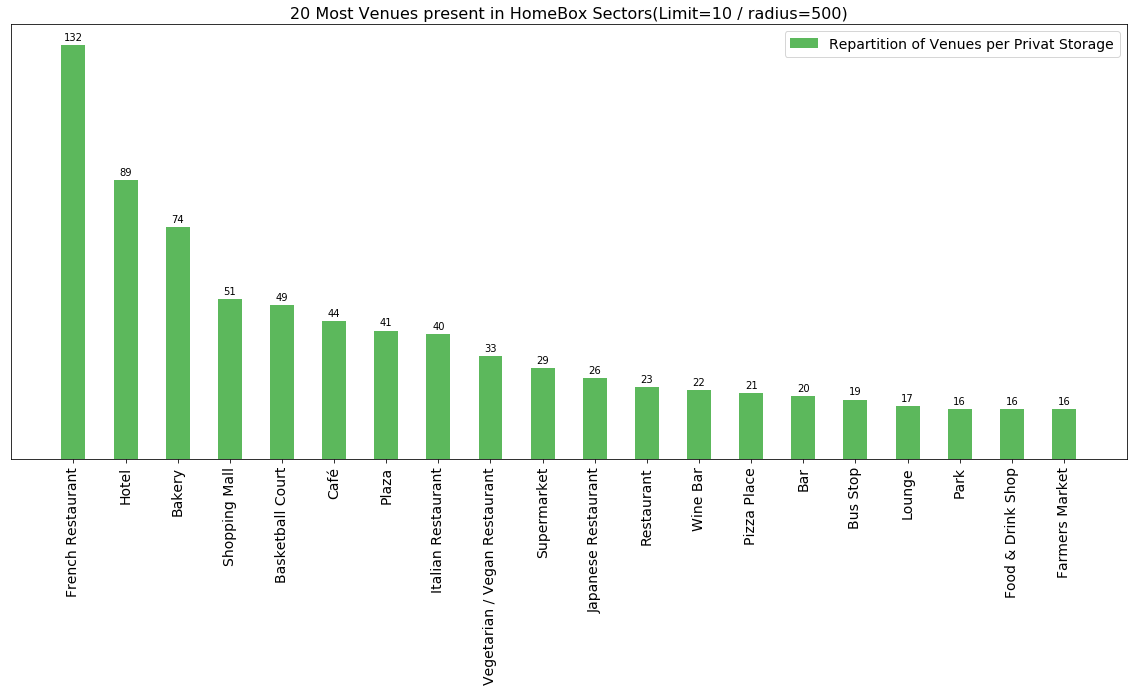

In [20]:
plt.figure(figsize=(20,8))

# the width of the barsRepartition of Venues per Homebox Storage
barWidth = 0.46 

#define bar plots
bars1 = df_new_sort['Count']

#bars2 = df_new_sort1['Count']

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]]

# Make the plot  
rects1= plt.bar(r1, bars1, color='#5cb85c', width=barWidth, edgecolor='', label='Repartition of Venues per Privat Storage')

#rects2= plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='', label='Profitability in %')

#plot x axis values
#plt.xticks([r + barWidth for r in range(len(bars2))], ['Nord-pas-de-calais','Midi-pyrenees','Languedoc-roussillon','Lorraine','Picardie','Bourgogne','Basse-normandie','Champagne-ardenne','Haute-normandie','Ile-de-france','Provence-alpes-cote','Rhone-alpes'], fontsize=14, rotation=90)

plt.xticks([r + barWidth for r in range(len(bars1))], df_new_sort['Venue Category'], fontsize=14, rotation=90)
#Attach a text label above each bar in *rects*, displaying its height.

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
#autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('20 Most Venues present in HomeBox Sectors(Limit=10 / radius=500)', fontsize=16)
LIMIT = 50
radius = 1500

# Plot legeng
plt.legend(fontsize=14)

# How to hide y axis
plt.yticks([])

#fig.tight_layout()
plt.show()
 

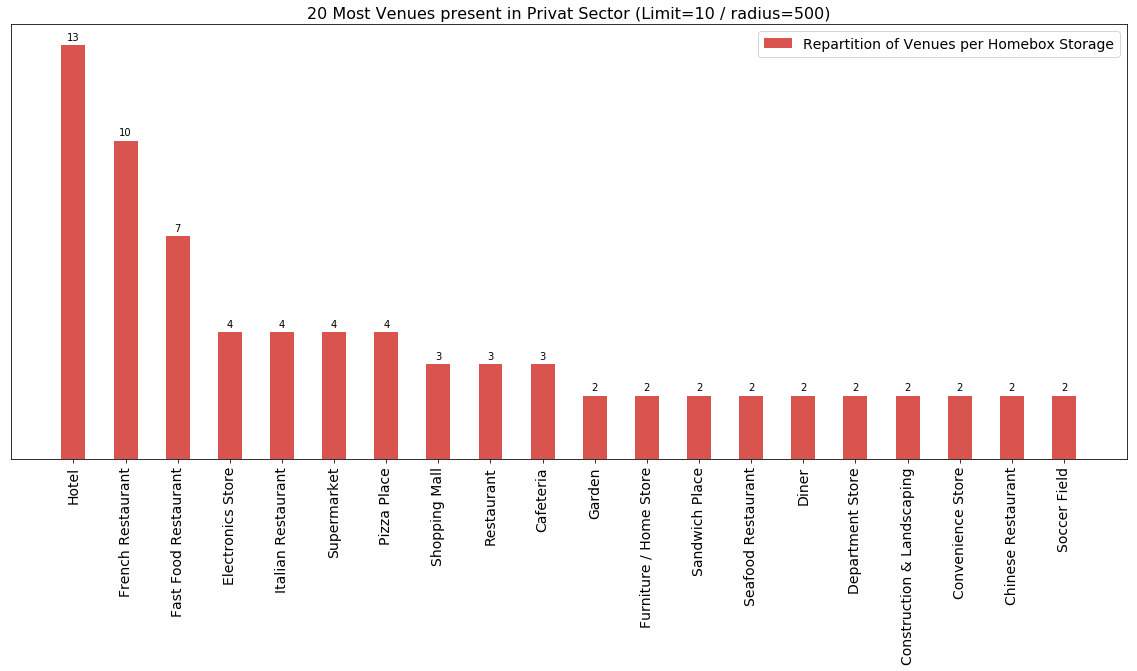

In [22]:
plt.figure(figsize=(20,8))

# the width of the bars
barWidth = 0.46 

#define bar plots
bars1 = df_new_sort1['Count']

#bars2 = df_new_sort1['Count']

# Set position of bar on X axis

#r1 = np.arange(len(bars1))
r1 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]]

# Make the plot  
rects1= plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='', label='Repartition of Venues per Homebox Storage')

#rects2= plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='', label='Profitability in %')

#plot x axis values
#plt.xticks([r + barWidth for r in range(len(bars2))], ['Nord-pas-de-calais','Midi-pyrenees','Languedoc-roussillon','Lorraine','Picardie','Bourgogne','Basse-normandie','Champagne-ardenne','Haute-normandie','Ile-de-france','Provence-alpes-cote','Rhone-alpes'], fontsize=14, rotation=90)

plt.xticks([r + barWidth for r in range(len(bars1))], df_new_sort1['Venue Category'], fontsize=14, rotation=90)
#Attach a text label above each bar in *rects*, displaying its height.

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
#autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('20 Most Venues present in Privat Sector (Limit=10 / radius=500)', fontsize=16)

# Plot legeng
plt.legend(fontsize=14)

# How to hide y axis
plt.yticks([])

#fig.tight_layout()
plt.show()
 

In [104]:
avion = list(set(df_new_sort['Venue Category']) - set(df_new_sort1['Venue Category']))#  Differents Venues 50/1500
avion

['Café',
 'Lounge',
 'Wine Bar',
 'Plaza',
 'Bakery',
 'Bar',
 'Bus Stop',
 'Farmers Market',
 'Basketball Court',
 'Vegetarian / Vegan Restaurant',
 'Food & Drink Shop',
 'Park',
 'Japanese Restaurant']

In [105]:
avion1 = list(set(df_new_sort1['Venue Category']) - set(df_new_sort['Venue Category']))#  Differents Venues 50/1500
avion1

['Furniture / Home Store',
 'Seafood Restaurant',
 'Department Store',
 'Fast Food Restaurant',
 'Convenience Store',
 'Cafeteria',
 'Diner',
 'Chinese Restaurant',
 'Sandwich Place',
 'Construction & Landscaping',
 'Electronics Store',
 'Garden',
 'Soccer Field']

In [24]:
#Find intersection between twoo list 10 to 500
missing = []
d = [x.lower() for x in df_new_sort['Venue Category']]
for m in df_new_sort1['Venue Category']:
    if m.lower() in d:
        missing.append(m)
print(missing)

['Hotel', 'French Restaurant', 'Italian Restaurant', 'Supermarket', 'Pizza Place', 'Shopping Mall', 'Restaurant']
